In [10]:
import pandas as pd
import numpy as np
import cvxpy as cp
df=pd.read_csv("inventory_opt.csv")
print(df.shape)
y=cp.Variable(14)

(14, 6)


In [33]:
df['Subcategory_sale%']=df['procurement_gmv']/df['procurement_gmv'].sum()

In [34]:
df

,Unnamed: 0,Sub_Category,total_procurement_sla_units,procurement_gmv,total_units_sold_sub_category,final,Subcategory_sale%
0,0,AmplifierReceiver,11897,88365003191,4082,2.164748e+07,2.979809e-05
1,1,AudioAccessory,34764,614120834700,12092,5.078737e+07,2.070914e-04
2,2,AudioMP3Player,300521,42886056664490,114644,3.740803e+08,1.446186e-02
3,3,Camera,280737,499913705130471,102383,4.882780e+09,1.685789e-01
4,4,CameraAccessory,637159,182598421598210,246265,7.414713e+08,6.157511e-02
5,5,CameraStorage,45973,780636757063,19080,4.091388e+07,2.632432e-04
6,6,Game,5043176,1077742239138904,118234,9.115333e+09,3.634319e-01
7,7,GameMembershipCards,362,16224478,98,1.655559e+05,5.471153e-09
8,8,GamingAccessory,524649,89832600583959,208826,4.301792e+08,3.029299e-02
9,9,GamingConsole,140319,39772166519097,29820,1.333741e+09,1.341181e-02


In [36]:
df['new_final']=df['final']/df['procurement_gmv'].sum()
df

,Unnamed: 0,Sub_Category,total_procurement_sla_units,procurement_gmv,total_units_sold_sub_category,final,Subcategory_sale%,new_final
0,0,AmplifierReceiver,11897,88365003191,4082,2.164748e+07,2.979809e-05,7.299875e-09
1,1,AudioAccessory,34764,614120834700,12092,5.078737e+07,2.070914e-04,1.712631e-08
2,2,AudioMP3Player,300521,42886056664490,114644,3.740803e+08,1.446186e-02,1.261458e-07
3,3,Camera,280737,499913705130471,102383,4.882780e+09,1.685789e-01,1.646552e-06
4,4,CameraAccessory,637159,182598421598210,246265,7.414713e+08,6.157511e-02,2.500360e-07
5,5,CameraStorage,45973,780636757063,19080,4.091388e+07,2.632432e-04,1.379681e-08
6,6,Game,5043176,1077742239138904,118234,9.115333e+09,3.634319e-01,3.073836e-06
7,7,GameMembershipCards,362,16224478,98,1.655559e+05,5.471153e-09,5.582810e-11
8,8,GamingAccessory,524649,89832600583959,208826,4.301792e+08,3.029299e-02,1.450633e-07
9,9,GamingConsole,140319,39772166519097,29820,1.333741e+09,1.341181e-02,4.497589e-07


In [41]:
ar=np.array(df['Sub_Category'])
ar

array(['AmplifierReceiver', 'AudioAccessory', 'AudioMP3Player', 'Camera',
       'CameraAccessory', 'CameraStorage', 'Game', 'GameMembershipCards',
       'GamingAccessory', 'GamingConsole', 'HomeAudio', 'HomeTheatre',
       'Speaker', 'TVVideoSmall'], dtype=object)

In [18]:
df["final"]

0     2.164748e+07
1     5.078737e+07
2     3.740803e+08
3     4.882780e+09
4     7.414713e+08
5     4.091388e+07
6     9.115333e+09
7     1.655559e+05
8     4.301792e+08
9     1.333741e+09
10    6.792068e+08
11    5.704200e+07
12    1.586889e+09
13    4.755204e+08
Name: final, dtype: float64

In [11]:
w=np.array(df['final'])

In [12]:
w

array([2.16474775e+07, 5.07873664e+07, 3.74080254e+08, 4.88278039e+09,
       7.41471267e+08, 4.09138762e+07, 9.11533264e+09, 1.65555898e+05,
       4.30179195e+08, 1.33374133e+09, 6.79206812e+08, 5.70419957e+07,
       1.58688910e+09, 4.75520419e+08])

In [32]:
import numpy as np

# Given weight vector w
w = np.array([
    2.16474775e+07, 5.07873664e+07, 3.74080254e+08, 4.88278039e+09,
    7.41471267e+08, 4.09138762e+07, 9.11533264e+09, 1.65555898e+05,
    4.30179195e+08, 1.33374133e+09, 6.79206812e+08, 5.70419957e+07,
    1.58688910e+09, 4.75520419e+08
])

# Number of elements
n = len(w)

# Learning rate
alpha = 0.001  # Step size

# Maximum iterations
max_iters = 10000

# Tolerance for convergence
tolerance = 1e-9

# Initialize y (starting point: equal distribution)
y = np.ones(n) / n

# Gradient of the objective function: ∇f(y) = w
def gradient(y):
    return w  # Since f(y) = w^T y, the gradient is just w

# Gradient Ascent Loop
for i in range(max_iters):
    grad = gradient(y)
    y_new = y + alpha * grad  # Gradient ascent update
    y_new = np.maximum(y_new, 0)  # Ensure non-negativity
    y_new /= np.sum(y_new)  # Normalize to ensure sum(y) = 1
    
    # Check for convergence
    if np.linalg.norm(y_new - y) < tolerance:
        print(f"Converged in {i+1} iterations")
        break
    
    y = y_new

# Display results
print("Optimal y:", y)
print("Optimal objective value:", np.dot(w, y))

Converged in 3 iterations
Optimal y: [1.09387279e-03 2.56634605e-03 1.89027203e-02 2.46732702e-01
 3.74674253e-02 2.06742684e-03 4.60608603e-01 8.36573649e-06
 2.17374665e-02 6.73955362e-02 3.43211283e-02 2.88239991e-03
 8.01873942e-02 2.40286125e-02]
Optimal objective value: 5699822371.118949


In [39]:
y_new /= np.sum(y_new)  # Normalize to ensure sum(y) = 1

In [40]:
y_new*100

array([1.09387279e-01, 2.56634605e-01, 1.89027203e+00, 2.46732702e+01,
       3.74674253e+00, 2.06742684e-01, 4.60608603e+01, 8.36573649e-04,
       2.17374665e+00, 6.73955362e+00, 3.43211283e+00, 2.88239991e-01,
       8.01873942e+00, 2.40286125e+00])

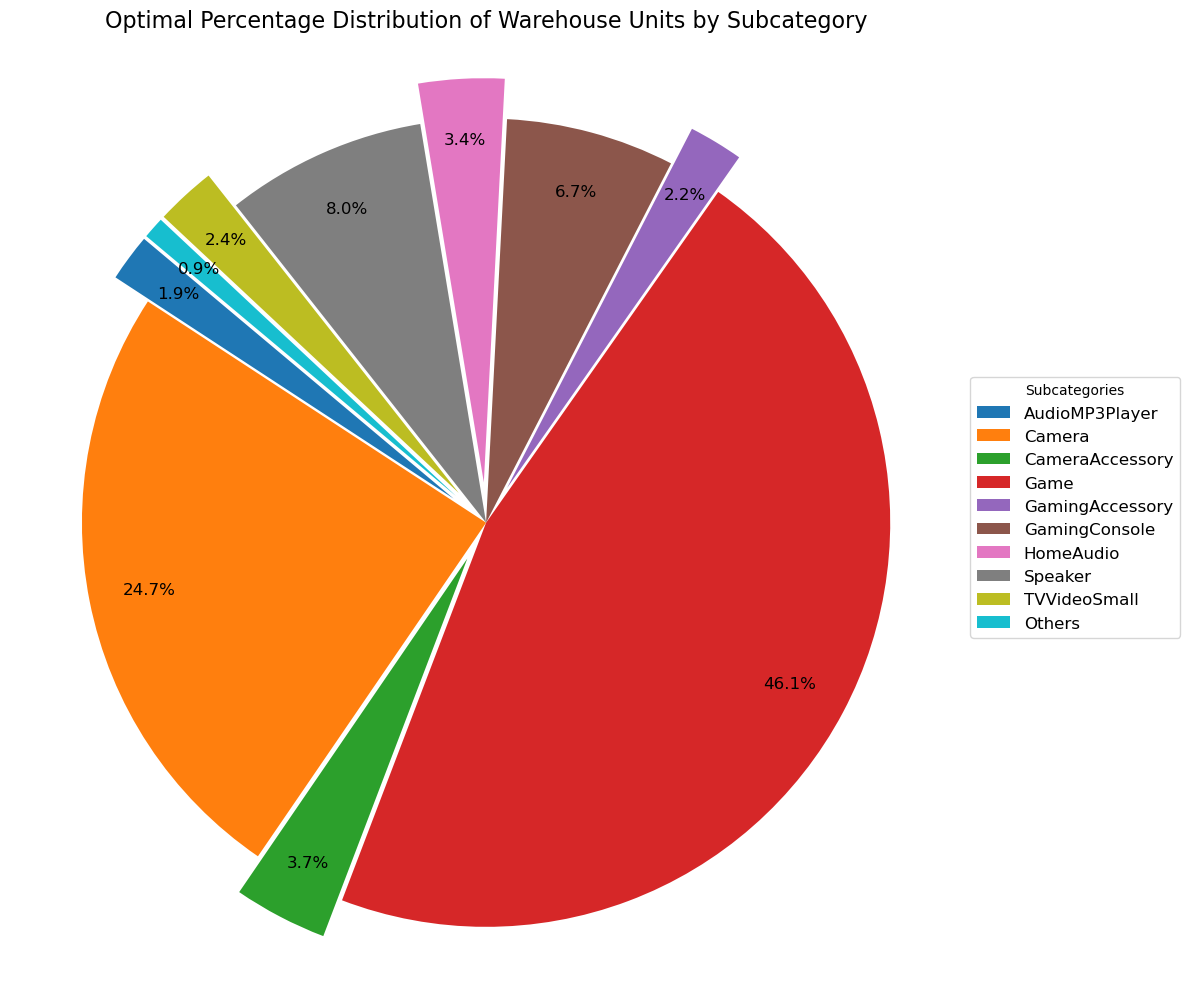

In [45]:
import matplotlib.pyplot as plt

# Subcategories and their corresponding weights
subcategories = ['AmplifierReceiver', 'AudioAccessory', 'AudioMP3Player', 'Camera',
                 'CameraAccessory', 'CameraStorage', 'Game', 'GameMembershipCards',
                 'GamingAccessory', 'GamingConsole', 'HomeAudio', 'HomeTheatre',
                 'Speaker', 'TVVideoSmall']

weights = [1.09387279e-01, 2.56634605e-01, 1.89027203e+00, 2.46732702e+01,
           3.74674253e+00, 2.06742684e-01, 4.60608603e+01, 8.36573649e-04,
           2.17374665e+00, 6.73955362e+00, 3.43211283e+00, 2.88239991e-01,
           8.01873942e+00, 2.40286125e+00]

# Define a threshold for grouping small weights into "Others"
threshold = 1.0  # Adjust this threshold as needed

# Group small weights into "Others"
grouped_subcategories = []
grouped_weights = []
others_weight = 0

for subcategory, weight in zip(subcategories, weights):
    if weight < threshold:
        others_weight += weight
    else:
        grouped_subcategories.append(subcategory)
        grouped_weights.append(weight)

if others_weight > 0:
    grouped_subcategories.append('Others')
    grouped_weights.append(others_weight)

# Normalize weights to percentages
total = sum(grouped_weights)
percentages = [(w / total) * 100 for w in grouped_weights]

# Explode smaller slices for better visibility
explode = [0.1 if p < 5 else 0 for p in percentages]

# Plotting the pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140, explode=explode, pctdistance=0.85, textprops={'fontsize': 12})

# Add a legend
plt.legend(wedges, grouped_subcategories, title="Subcategories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Increase font size for percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('Optimal Percentage Distribution of Warehouse Units by Subcategory', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()